In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\karth\Desktop\Decoder Lecture\Sessions\Movies Anlyis Case Study 2+ Uber case study\Uber Request Data (1).csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
len(df["Request id"].unique())

6745

In [5]:
df.shape

(6745, 6)

In [6]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [8]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [9]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [10]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [11]:
df["Request timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [12]:
df["Drop timestamp"]=df["Drop timestamp"].astype(str)
df["Drop timestamp"]=df["Drop timestamp"].replace("/","-")
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [13]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [14]:
req_hour=df["Request timestamp"].dt.hour
req_hour

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [15]:
df["req_hour"]=req_hour

In [16]:
df.req_hour.value_counts()

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: req_hour, dtype: int64

In [17]:
df["Req_Day"]=df["Request timestamp"].dt.day
df["Req_Day"]

0       11
1       11
2       12
3       12
4       13
        ..
6740    15
6741    15
6742    15
6743    15
6744    15
Name: Req_Day, Length: 6745, dtype: int64

In [18]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,Req_Day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


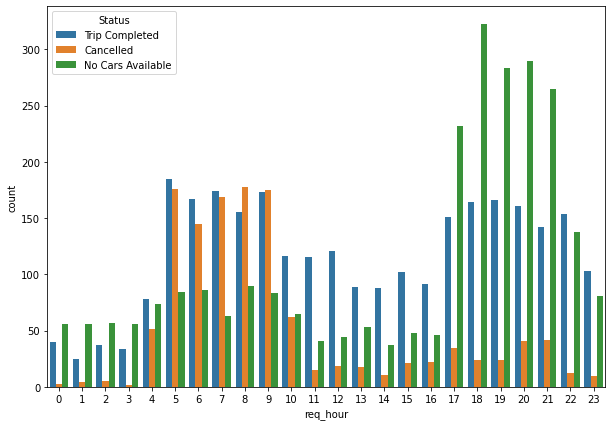

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

C:\Users\karth\anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


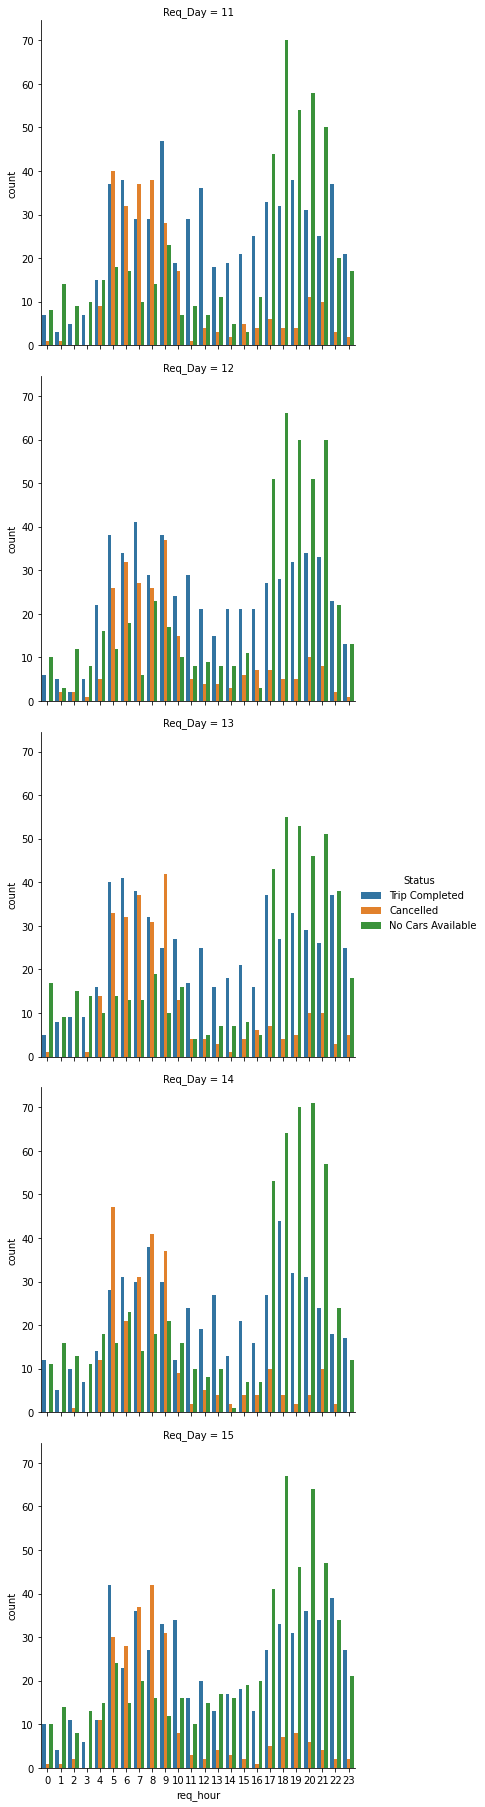

In [20]:
sns.factorplot(x="req_hour",data=df,row="Req_Day",hue="Status",kind="count")
plt.show()

C:\Users\karth\anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


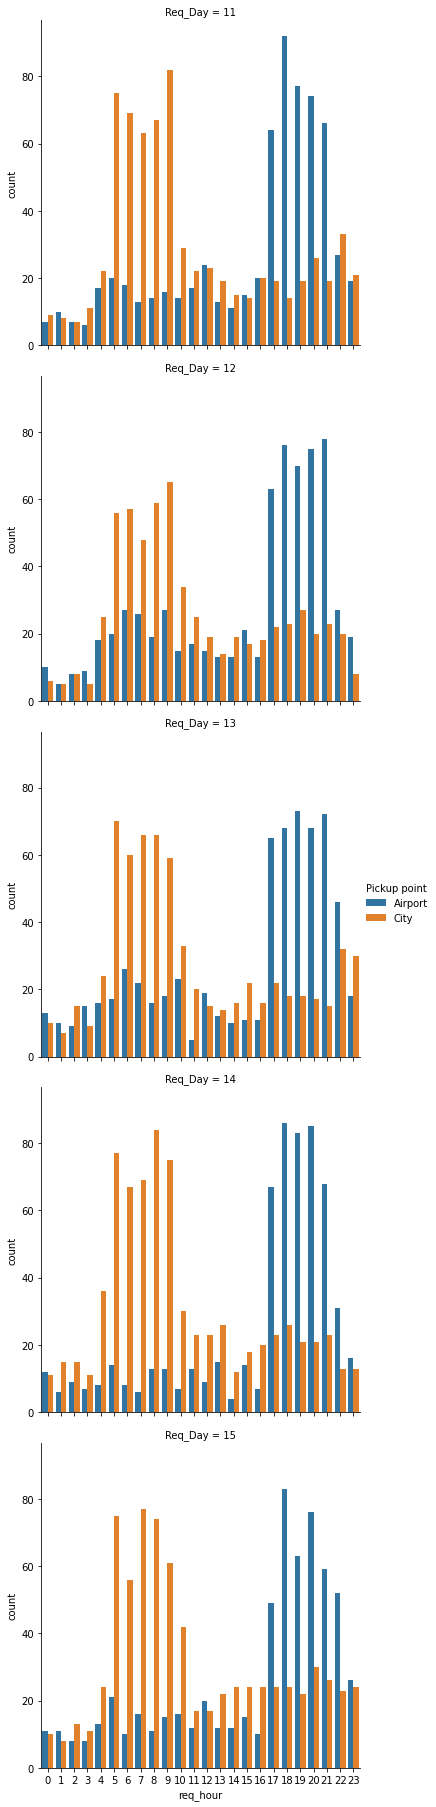

In [21]:

sns.factorplot(x="req_hour",data=df,row="Req_Day",hue="Pickup point",kind="count")
plt.show()

C:\Users\karth\anaconda3\envs\ML\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


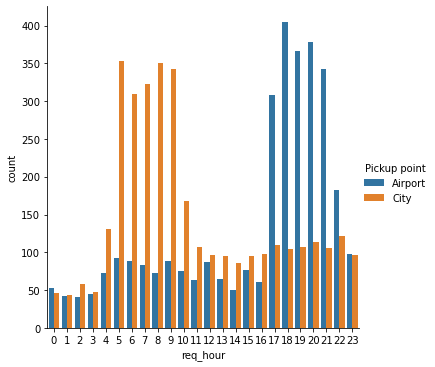

In [22]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [ ]:
<5 : "Pre_Morning"
5<=x<=10 : "Morning Rush"
10<=x<17  : "Day Time"
17<=x<=22 : "Evening Rush"
else "Late Night"

In [24]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,Req_Day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [26]:
df["Slot"]=0
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,Req_Day,Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0


In [28]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre-Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1

In [29]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,Req_Day,Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush


In [30]:
df.Slot.value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre-Morning      578
Late_Night       498
Name: Slot, dtype: int64

<AxesSubplot:xlabel='Slot', ylabel='count'>

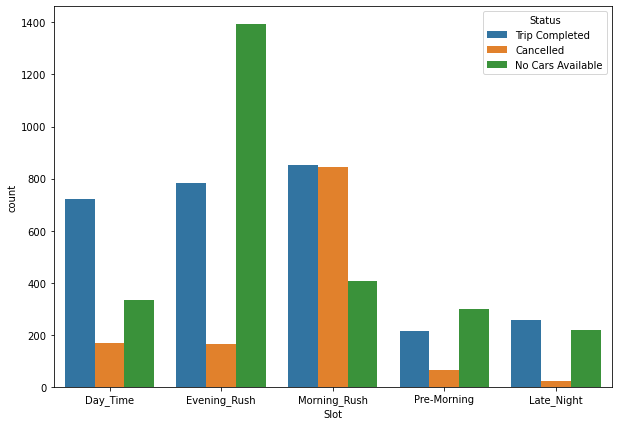

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x="Slot",data=df,hue="Status")

In [37]:
Morning_Rush=df[df["Slot"]=="Morning_Rush"]
Morning_Rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,Req_Day,Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

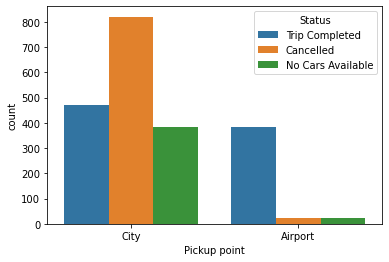

In [36]:
sns.countplot(x="Pickup point",hue="Status",data=Morning_Rush)

# Severity of Problem by Location and thier count ,cancellation of cabs as per their Pickup-Point

In [41]:
 Airport_cancelled=Morning_Rush.loc[(Morning_Rush["Pickup point"]=="Airport") &( Morning_Rush["Status"]=="Cancelled")]

In [42]:
Airport_cancelled.shape[0]

23

In [43]:
City_cancelled=Morning_Rush.loc[(Morning_Rush["Pickup point"]=="City") &( Morning_Rush["Status"]=="Cancelled")]

In [44]:
City_cancelled.shape[0]

820

# Supply And Demand

In [47]:
Morning_Rush.loc[(Morning_Rush["Pickup point"]=="City")]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,Req_Day,Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning_Rush
30,1826,City,4.0,Trip Completed,2016-07-12 09:27:00,2016-07-12 10:27:00,9,12,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


# Morning Rush

## City Supply & Demand In Morning 

In [49]:
Morning_supply=Morning_Rush.loc[(Morning_Rush["Pickup point"]=="City") & (Morning_Rush["Status"]=="Trip Completed")]

In [50]:
Morning_supply.shape[0]

472

In [51]:
Morning_Demand=Morning_Rush.loc[(Morning_Rush["Pickup point"]=="City") & (Morning_Rush["Status"]=="No Cars Available")]

In [52]:
Morning_Demand.shape[0]

385

## Airport Supply & Demand In Morning

In [77]:
Morning_supply_airport=Morning_Rush.loc[(Morning_Rush["Pickup point"]=="Airport") & (Morning_Rush["Status"]=="Trip Completed")]
Morning_supply_airport.shape[0]

382

In [78]:
Morning_Demand_airport=Morning_Rush.loc[(Morning_Rush["Pickup point"]=="Airport") & (Morning_Rush["Status"]=="No Cars Available")]
Morning_Demand_airport.shape[0]

21